In [243]:
#importing the required libraries
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import r2_score,mean_squared_error




In [287]:
#downloading iris dataset from sklearn
iris = load_iris()
#creating a dataframe of the dataset
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)
#adding the target data as new column naming it species
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
#printing the first five rows of the data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [289]:
#printing the names of columns of the dataset
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [246]:
#printing the shape of the dataset
iris_df.shape

(150, 5)

In [247]:
#checking for null values in each column
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [248]:
#printing the dataset information
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [249]:
#priting the numerical weights and averages of the dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [250]:
#printing the count of each category of the species 
iris_df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [251]:
#printing the mean of each catgory of the species
iris_df.groupby('species').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


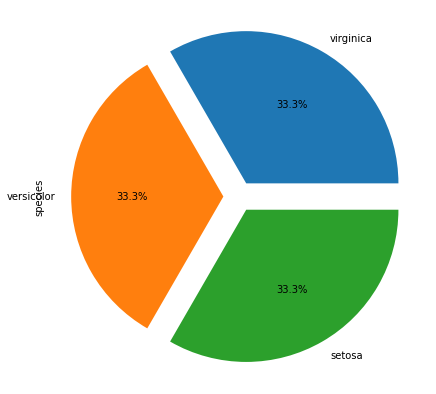

In [252]:
#Visualising the species data based on count of each category using a pie chart
iris_df['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],
                  autopct='%1.1f%%', figsize=(7,7))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bafa14d10>,
      dtype=object)

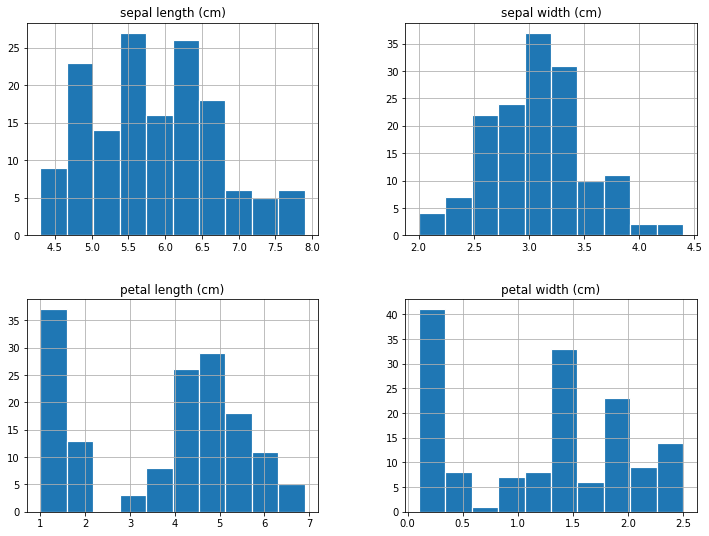

In [253]:
#Visualising the sepal and petal properties using a histogram, making bins of each category 

iris_df.hist(edgecolor = 'white', linewidth=1.2, figsize=(12,9))

In [254]:
#preparing the data for ML model
print(iris_df.head())
x = iris_df.drop('species', axis=1)
y= iris_df.species

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
0                5.1               3.5  ...               0.2   setosa
1                4.9               3.0  ...               0.2   setosa
2                4.7               3.2  ...               0.2   setosa
3                4.6               3.1  ...               0.2   setosa
4                5.0               3.6  ...               0.2   setosa

[5 rows x 5 columns]


In [255]:
#Dividing the data into train and test data in the ration 80:20 standard
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)



In [256]:
#printing the shape of data before and after splitting it 
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(150, 4)
(120, 4)
(30, 4)
(150,)
(120,)
(30,)


KNN Model


In [257]:
#Training the KNN model using the data
#training the nearest neighbour starting with k=9
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform')
#fitting the model
knn.fit(x_train, y_train)
#printing the accuracy of the model on the train data
print('Accuracy on train data:')
print(knn.score(x_train, y_train))
#printing the accuracy of the model on the test data
print('Accuracy on test data:')
print(knn.score(x_test, y_test))


Accuracy on train data:
0.9833333333333333
Accuracy on test data:
0.9666666666666667


In [296]:
#setting the range of neighbours from 1 to 35
k_range=list(range(1,35))
#considering distane and uniform as the weight parameters
options=['distance','uniform']

In [298]:
#creating a parameter distribution with the range and weights as declared above
param_dist = dict(n_neighbors=k_range, weights = options)

In [299]:
#using the knn classifier
knn=KNeighborsClassifier()
#tuning the number of k usingRandomizedCV 
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=30, random_state=5)
#fitting the model with the randomized weights
rand.fit(x, y)
#printing the results obtained
rand.cv_results_

{'mean_fit_time': array([0.00202374, 0.00210922, 0.00184679, 0.00168371, 0.00161724,
        0.00182722, 0.00181344, 0.00167177, 0.00190101, 0.00169251,
        0.00164309, 0.00176299, 0.00208886, 0.00187469, 0.00180018,
        0.00174587, 0.00173759, 0.00160818, 0.00167964, 0.00165982,
        0.00182927, 0.00200708, 0.00197494, 0.00183325, 0.00165415,
        0.00169768, 0.00175457, 0.00169251, 0.00182376, 0.00168164]),
 'mean_score_time': array([0.00190256, 0.00288162, 0.00195901, 0.00219336, 0.00169449,
        0.0019325 , 0.00238242, 0.00222354, 0.00227242, 0.00178974,
        0.0017158 , 0.00225096, 0.00258465, 0.00190268, 0.0024049 ,
        0.00218422, 0.00213618, 0.00173795, 0.00178123, 0.00179503,
        0.00257077, 0.00226073, 0.00280366, 0.00233827, 0.00181057,
        0.00174882, 0.00215914, 0.00181568, 0.00172896, 0.00216308]),
 'mean_test_score': array([0.97333333, 0.97333333, 0.98      , 0.94666667, 0.96666667,
        0.97333333, 0.98      , 0.97333333, 0.98      , 0

In [300]:
#printing the best accuracy obtained
print('Best Accuracy: ')
print(rand.best_score_)
#printing the parameters for which the best accuracy is obtained
print('Best Parameters: ')
print(rand.best_params_)

Best Accuracy: 
0.9800000000000001
Best Parameters: 
{'weights': 'distance', 'n_neighbors': 15}


SVM Model


In [305]:
#Training the SVM model using the data
#training the model without any kernel functions, C or gamma values
svm = SVC()
#fitting the model
svm.fit(x_train, y_train)
#printing the accuracy of the model on the train data
print('Accuracy on train data:')
print(svm.score(x_train, y_train))
#printing the accuracy of the model on the test data
print('Accuracy on test data:')
print(svm.score(x_test, y_test))

Accuracy on train data:
0.975
Accuracy on test data:
0.9666666666666667


In [265]:
#mapping the string data into numerics to caluclate the rmse
#y_train_map=y_train.map({'versicolor':1,'virginica':2,'setosa':3})
#y_test_map=y_test.map({'versicolor':1,'virginica':2,'setosa':3})
#calculating the mean squared error
#mse = mean_squared_error(x_test,y_test)
#calculating the root mean square error


In [266]:
#training the model using knn with rbf kernel function
rbf_svm= SVC(kernel='rbf')
#printing the kernel function used
rbf_svm.kernel

'rbf'

In [267]:
#fitting the model with rbf kernel function used
rbf_svm.fit(x_train, y_train)
#printing the accuracy of the model on the train data
print('Accuracy on train data:')
print(rbf_svm.score(x_train, y_train))
#printing the accuracy of the model on the test data
print('Accuracy on test data:')
print(rbf_svm.score(x_test, y_test))

Accuracy on train data:
0.975
Accuracy on test data:
0.9666666666666667


In [268]:
#training the model using knn with linear kernel function
linear_svm=SVC(kernel='linear')
#fitting the model with rbf kernel function used
linear_svm.fit(x_train,y_train)
#printing the accuracy of the model on the train data
print('Accuracy on train data:')
print(linear_svm.score(x_train,y_train))
#printing the accuracy of the model on the test data
print('Accuracy on test data:')
print(linear_svm.score(x_test,y_test))


Accuracy on train data:
0.9916666666666667
Accuracy on test data:
0.9333333333333333


In [301]:
#Tune SVM hyperparameters by using GridSearchCV with cross validation 
param_grid = { 'C':[0.1,1,10,100,1000],#drtting the c values as above
              'kernel':['rbf'], #using only rbf as kernel function( can used linear, poly and sigmoid too)
              'degree':[1,2,3,4,5,6],#setting the degree from 1 to6
              'gamma': [1, 0.1, 0.01, 0.001,0.0001]}#setting the gamma range as above
#creating a grid with above prameter grid made
grid = GridSearchCV(SVC(),param_grid)

In [303]:
#fitting the model with the grid made above
grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [286]:
#printing the best fit values of C, degree and gamma
print(grid.best_params_)
#printing the accuracy of the model with these parameter values
print(grid.score(x_test,y_test))


{'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.9666666666666667


#END OF CODE